Price Prediction

In [201]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [202]:
housing_data = fetch_california_housing()

In [203]:
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [204]:
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)

In [205]:
df['target'] = housing_data.target

In [206]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [207]:
fig = px.scatter_geo(df, lat='Latitude', lon='Longitude')
fig.update_geos(fitbounds="locations")

In [208]:
scaler = StandardScaler()

In [209]:
X = df.iloc[:,:-1]
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [210]:
y = df.iloc[:,-1]
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)

In [212]:
model = LinearRegression()

In [213]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [214]:
y_pred = model.predict(X_test)

In [215]:
result = pd.DataFrame({ "pred": y_pred, "actual": y_test })

In [216]:
result

,pred,actual
20046,0.726049,0.47700
3024,1.767434,0.45800
15663,2.710922,5.00001
20484,2.835147,2.18600
9814,2.606958,2.78000
...,...,...
17505,2.219941,2.37500
13512,0.910516,0.67300
10842,2.074655,2.18400
16559,1.573714,1.19400


In [217]:
mean_squared_error(result['actual'], result['pred']) * 100

53.05677824766756

In [218]:
mean_absolute_error(result['actual'], result['pred']) * 100

52.72474538305959

# Standardization with pipeline

In [219]:
model = make_pipeline(StandardScaler(), LinearRegression())

In [220]:
model.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [221]:
y_pred_pipeline = model.predict(X_test)

In [222]:
scaled_result = pd.DataFrame({ 'actual': y_test, 'pred': y_pred_pipeline })

In [223]:
scaled_result

,actual,pred
20046,0.47700,0.726049
3024,0.45800,1.767434
15663,5.00001,2.710922
20484,2.18600,2.835147
9814,2.78000,2.606958
...,...,...
17505,2.37500,2.219941
13512,0.67300,0.910516
10842,2.18400,2.074655
16559,1.19400,1.573714


In [224]:
mean_squared_error(scaled_result['actual'], scaled_result['pred']) * 100

53.0567782476675

In [225]:
mean_absolute_error(scaled_result['actual'], scaled_result['pred']) * 100

52.72474538305952

# Decision Tree Regressor

In [226]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [227]:
params = {
    "criterion":["mse",'friedman_mse' ,'mae'],
    "splitter":["best", "random"],
    "max_depth":[None, 10 , 20 , 30 , 40 , 50],
    "min_samples_split":[2, 5, 10],
    "min_samples_leaf":[1, 2, 4]
}

In [228]:
tree_model = DecisionTreeRegressor()

In [229]:
tree_model

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [230]:
grid_tree = GridSearchCV(estimator=tree_model, param_grid=params)

In [231]:
y_train.values.ravel()

array([1.938, 1.697, 2.598, ..., 2.221, 2.835, 3.25 ], shape=(14448,))

In [232]:
grid_tree.fit(X_train, y_train.values.ravel())

/Users/himanshu/Desktop/aistrike/data-science/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning:


1080 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/himanshu/Desktop/aistrike/data-science/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/himanshu/Desktop/aistrike/data-science/.venv/lib/python3.13/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['mse', 'friedman_mse', ...], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'friedman_mse'


In [233]:
grid_tree.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 50,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'random'}

In [234]:
tree_pred = grid_tree.predict(X_test)

In [235]:
tree_pred

array([0.543625  , 0.74333333, 3.9482525 , ..., 1.61275   , 1.67325   ,
       2.17785714], shape=(6192,))

In [236]:
tree_result = pd.DataFrame({ "actual": y_test, "pred": tree_pred })

In [237]:
tree_result

,actual,pred
20046,0.47700,0.543625
3024,0.45800,0.743333
15663,5.00001,3.948253
20484,2.18600,2.254571
9814,2.78000,3.495167
...,...,...
17505,2.37500,2.496750
13512,0.67300,0.656750
10842,2.18400,1.612750
16559,1.19400,1.673250


In [238]:
mean_squared_error(tree_result['actual'], tree_result['pred']) * 100

40.551263739630144

In [239]:
mean_absolute_error(tree_result['actual'], tree_result['pred']) * 100

42.50579183174034

# RandomForestRegressor 

In [240]:
rfm = RandomForestRegressor()

In [241]:
grid_params = {
    "max_depth": [5, 10 , 15],
    "n_estimators": [2, 3, 4, 5 ,6 , 7 ,8 , 9, 10]
}

In [242]:
grid_random_forest = GridSearchCV(estimator=rfm, param_grid=grid_params)

In [243]:
grid_random_forest.fit(X_train, y_train.values.ravel());

In [244]:
rf_pred = grid_random_forest.predict(X_test)

In [245]:
rf_result = pd.DataFrame({ "actual": y_test, 'pred': rf_pred })

In [246]:
rf_result

,actual,pred
20046,0.47700,0.515803
3024,0.45800,0.784195
15663,5.00001,4.941704
20484,2.18600,2.656270
9814,2.78000,2.240456
...,...,...
17505,2.37500,2.318302
13512,0.67300,0.715508
10842,2.18400,2.477809
16559,1.19400,1.292382


In [247]:
mean_squared_error(rf_result['actual'], rf_result['pred']) * 100

28.393573391889802

In [248]:
mean_absolute_error(rf_result['actual'], rf_result['pred']) * 100

35.254030002249834

# XGBoost

In [249]:
from xgboost import XGBRegressor

In [250]:
scaler = StandardScaler()

In [251]:
X_scaled_train = scaler.fit_transform(X_train)

In [252]:
X_scaled_test = scaler.transform(X_test)

In [253]:
xgmodel = XGBRegressor()

In [254]:
xgmodel.fit(X_scaled_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [255]:
xg_pred = xgmodel.predict(X_scaled_test)

In [256]:
xg_pred

array([0.61055505, 0.5508025 , 4.765771  , ..., 2.8856103 , 1.3401958 ,
       2.1619294 ], shape=(6192,), dtype=float32)

In [257]:
xg_result = pd.DataFrame({ 'actual': y_test, 'pred': xg_pred })

In [258]:
xg_result

,actual,pred
20046,0.47700,0.610555
3024,0.45800,0.550803
15663,5.00001,4.765771
20484,2.18600,2.568251
9814,2.78000,2.404391
...,...,...
17505,2.37500,2.425741
13512,0.67300,0.674767
10842,2.18400,2.885610
16559,1.19400,1.340196


In [259]:
mean_squared_error(xg_result['actual'], xg_result['pred']) * 100

21.18227380326636

In [260]:
mean_absolute_error(xg_result['actual'], xg_result['pred']) * 100

30.724618978712904

# Model Comparison - Predictions Visualization


In [285]:
# Collect all predictions for comparison
all_predictions = pd.DataFrame({
    'actual': y_test.values,
    'LinearRegression': result['pred'].values,
    'LinearRegression_Scaled': scaled_result['pred'].values,
    'DecisionTree': tree_result['pred'].values,
    'RandomForest': rf_result['pred'].values,
    'XGBoost': xg_result['pred'].values,
    'XGBoost_Pipeline': pipe.predict(X_test)
})

# Reset index to ensure alignment
all_predictions = all_predictions.reset_index(drop=True)
all_predictions.head()


,actual,LinearRegression,LinearRegression_Scaled,DecisionTree,RandomForest,XGBoost,XGBoost_Pipeline
0,0.47700,0.726049,0.726049,0.543625,0.515803,0.610555,0.610555
1,0.45800,1.767434,1.767434,0.743333,0.784195,0.550803,0.550803
2,5.00001,2.710922,2.710922,3.948253,4.941704,4.765771,4.765771
3,2.18600,2.835147,2.835147,2.254571,2.656270,2.568251,2.568251
4,2.78000,2.606958,2.606958,3.495167,2.240456,2.404391,2.404391


IndexError: index 6 is out of bounds for axis 0 with size 6

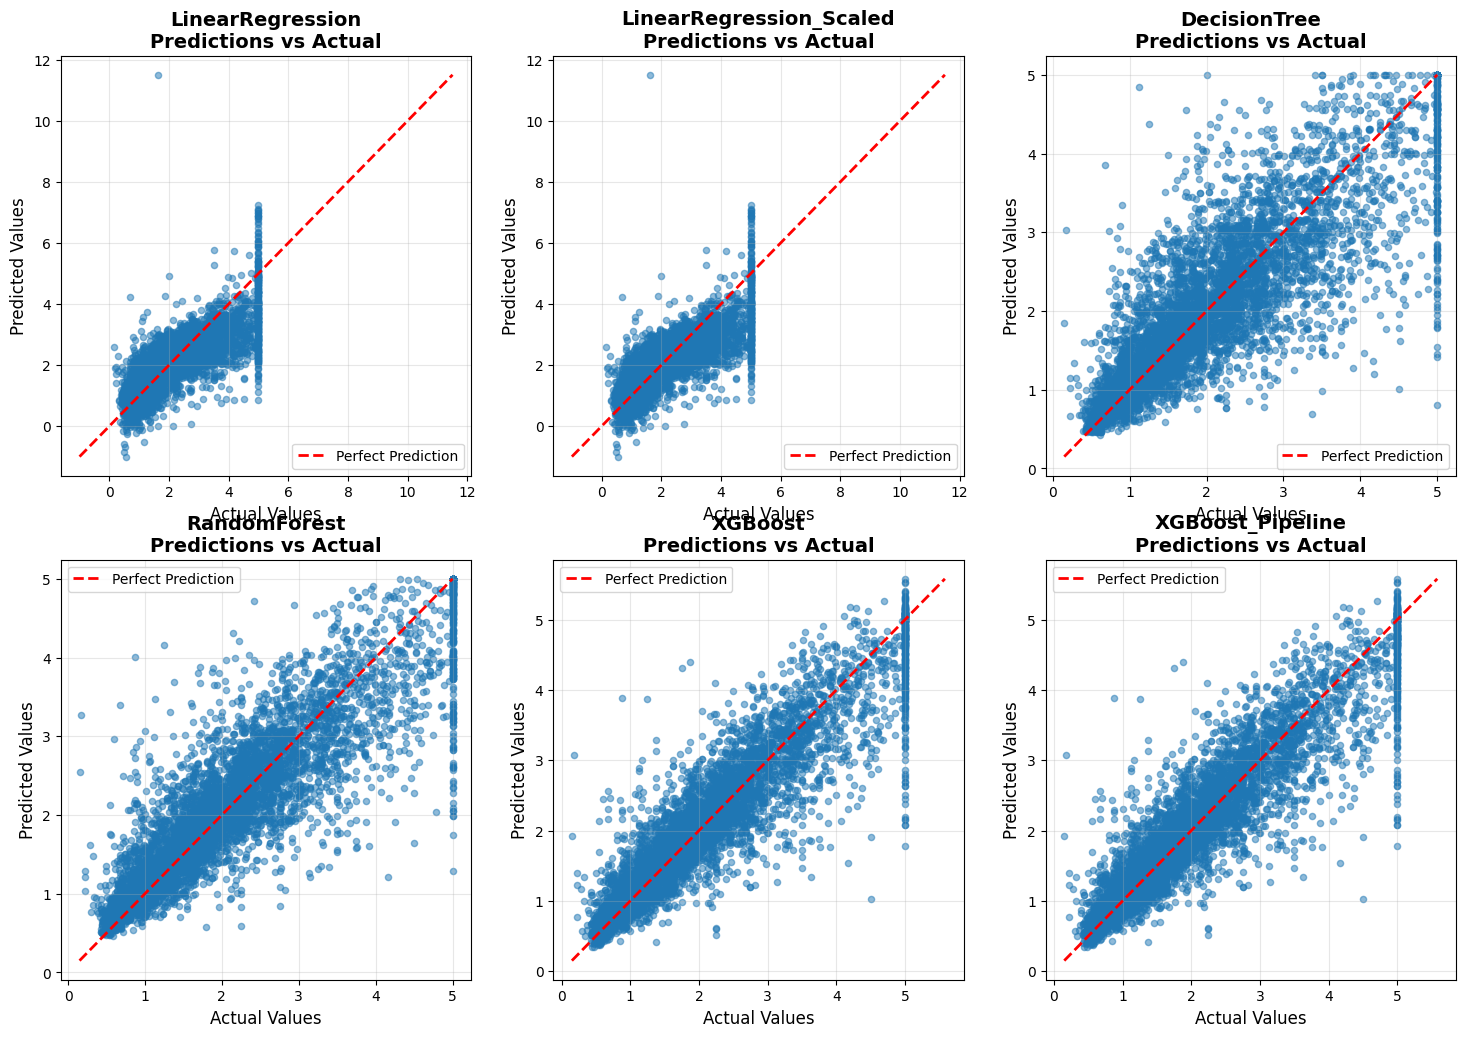

In [290]:
# Plot 1: Predictions vs Actual for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

models = ['LinearRegression', 'LinearRegression_Scaled', 'DecisionTree', 'RandomForest', 'XGBoost', "XGBoost_Pipeline"]

for idx, model in enumerate(models):
    ax = axes[idx]
    ax.scatter(all_predictions['actual'], all_predictions[model], alpha=0.5, s=20)
    
    # Add perfect prediction line
    min_val = min(all_predictions['actual'].min(), all_predictions[model].min())
    max_val = max(all_predictions['actual'].max(), all_predictions[model].max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    
    ax.set_xlabel('Actual Values', fontsize=12)
    ax.set_ylabel('Predicted Values', fontsize=12)
    ax.set_title(f'{model}\nPredictions vs Actual', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Remove the last empty subplot
fig.delaxes(axes[6])

plt.tight_layout()
plt.show()

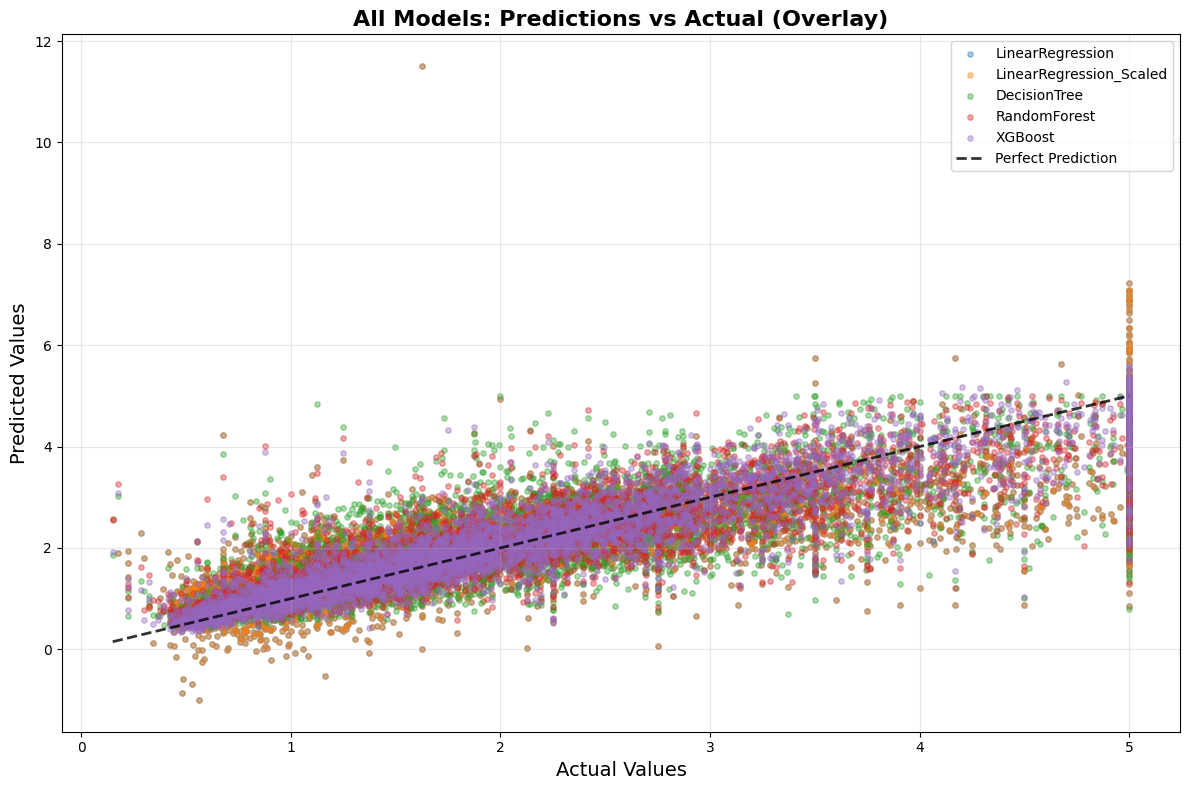

In [263]:
# Plot 2: Overlay comparison - All models on one plot
plt.figure(figsize=(12, 8))

for model in models:
    plt.scatter(all_predictions['actual'], all_predictions[model], 
               alpha=0.4, s=15, label=model)

# Perfect prediction line
min_val = all_predictions['actual'].min()
max_val = all_predictions['actual'].max()
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, 
         label='Perfect Prediction', alpha=0.8)

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('All Models: Predictions vs Actual (Overlay)', fontsize=16, fontweight='bold')
plt.legend(fontsize=10, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


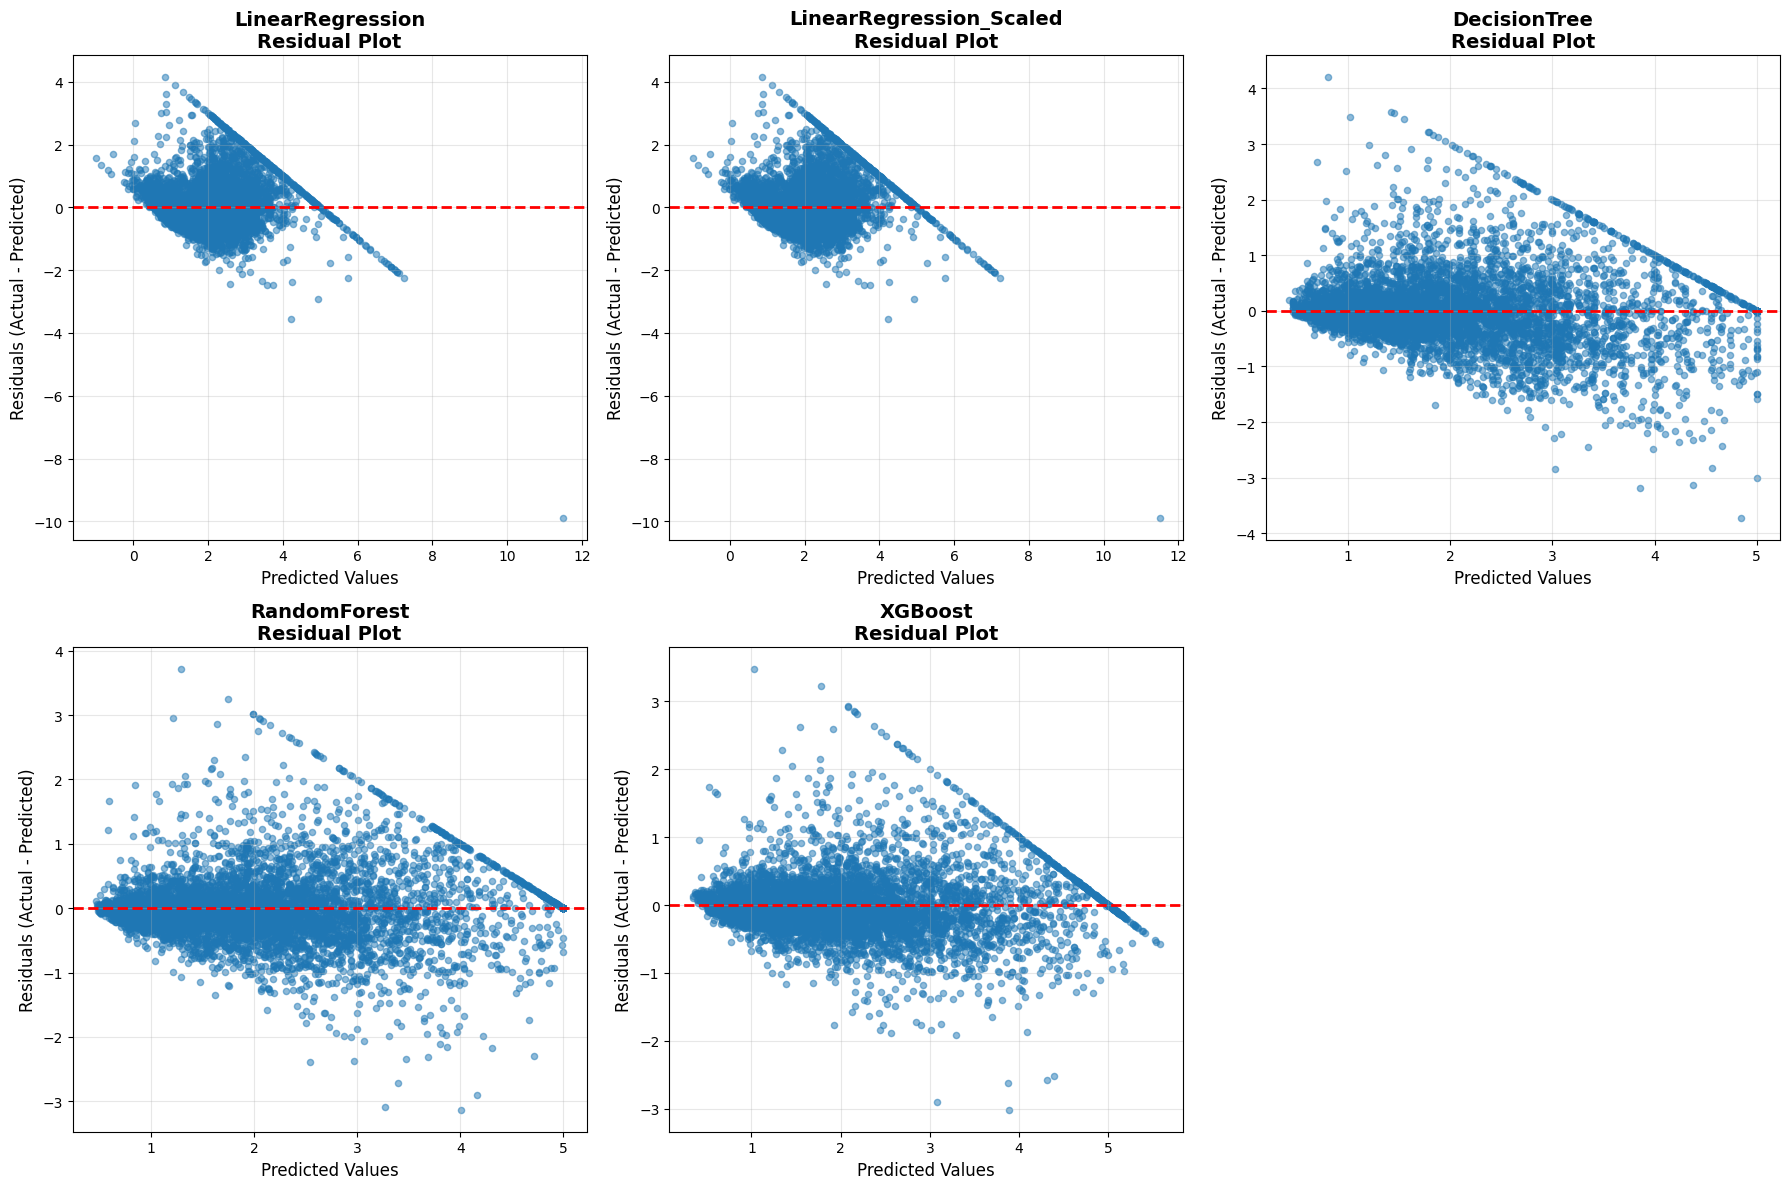

In [264]:
# Plot 3: Residuals comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, model in enumerate(models):
    ax = axes[idx]
    residuals = all_predictions['actual'] - all_predictions[model]
    ax.scatter(all_predictions[model], residuals, alpha=0.5, s=20)
    ax.axhline(y=0, color='r', linestyle='--', lw=2)
    ax.set_xlabel('Predicted Values', fontsize=12)
    ax.set_ylabel('Residuals (Actual - Predicted)', fontsize=12)
    ax.set_title(f'{model}\nResidual Plot', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)

# Remove the last empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()


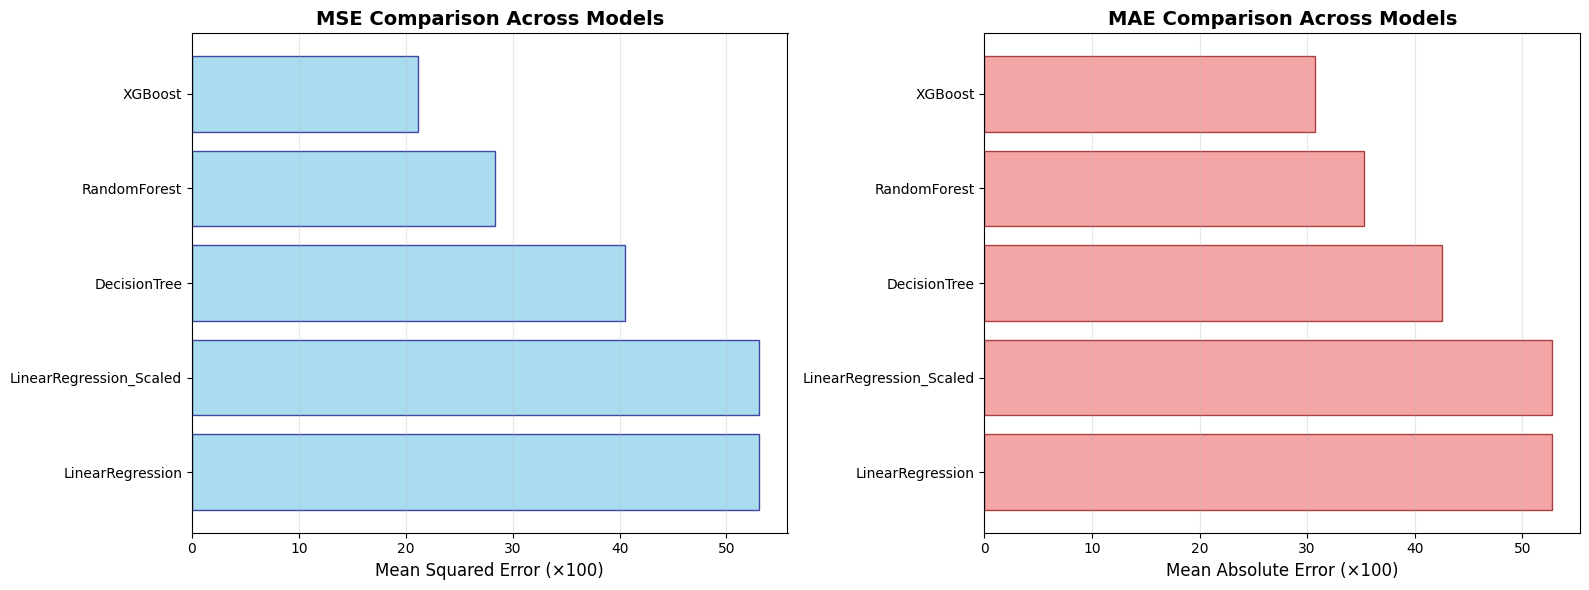


METRICS COMPARISON TABLE
                  Model       MSE       MAE
       LinearRegression 53.056778 52.724745
LinearRegression_Scaled 53.056778 52.724745
           DecisionTree 40.551264 42.505792
           RandomForest 28.393573 35.254030
                XGBoost 21.182274 30.724619


In [265]:
# Plot 4: Error distribution comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Calculate errors for all models
errors_data = []
for model in models:
    mse = mean_squared_error(all_predictions['actual'], all_predictions[model]) * 100
    mae = mean_absolute_error(all_predictions['actual'], all_predictions[model]) * 100
    errors_data.append({'Model': model, 'MSE': mse, 'MAE': mae})

errors_df = pd.DataFrame(errors_data)

# MSE comparison
axes[0].barh(errors_df['Model'], errors_df['MSE'], color='skyblue', edgecolor='navy', alpha=0.7)
axes[0].set_xlabel('Mean Squared Error (×100)', fontsize=12)
axes[0].set_title('MSE Comparison Across Models', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# MAE comparison
axes[1].barh(errors_df['Model'], errors_df['MAE'], color='lightcoral', edgecolor='darkred', alpha=0.7)
axes[1].set_xlabel('Mean Absolute Error (×100)', fontsize=12)
axes[1].set_title('MAE Comparison Across Models', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Display metrics table
print("\n" + "="*60)
print("METRICS COMPARISON TABLE")
print("="*60)
print(errors_df.to_string(index=False))
print("="*60)


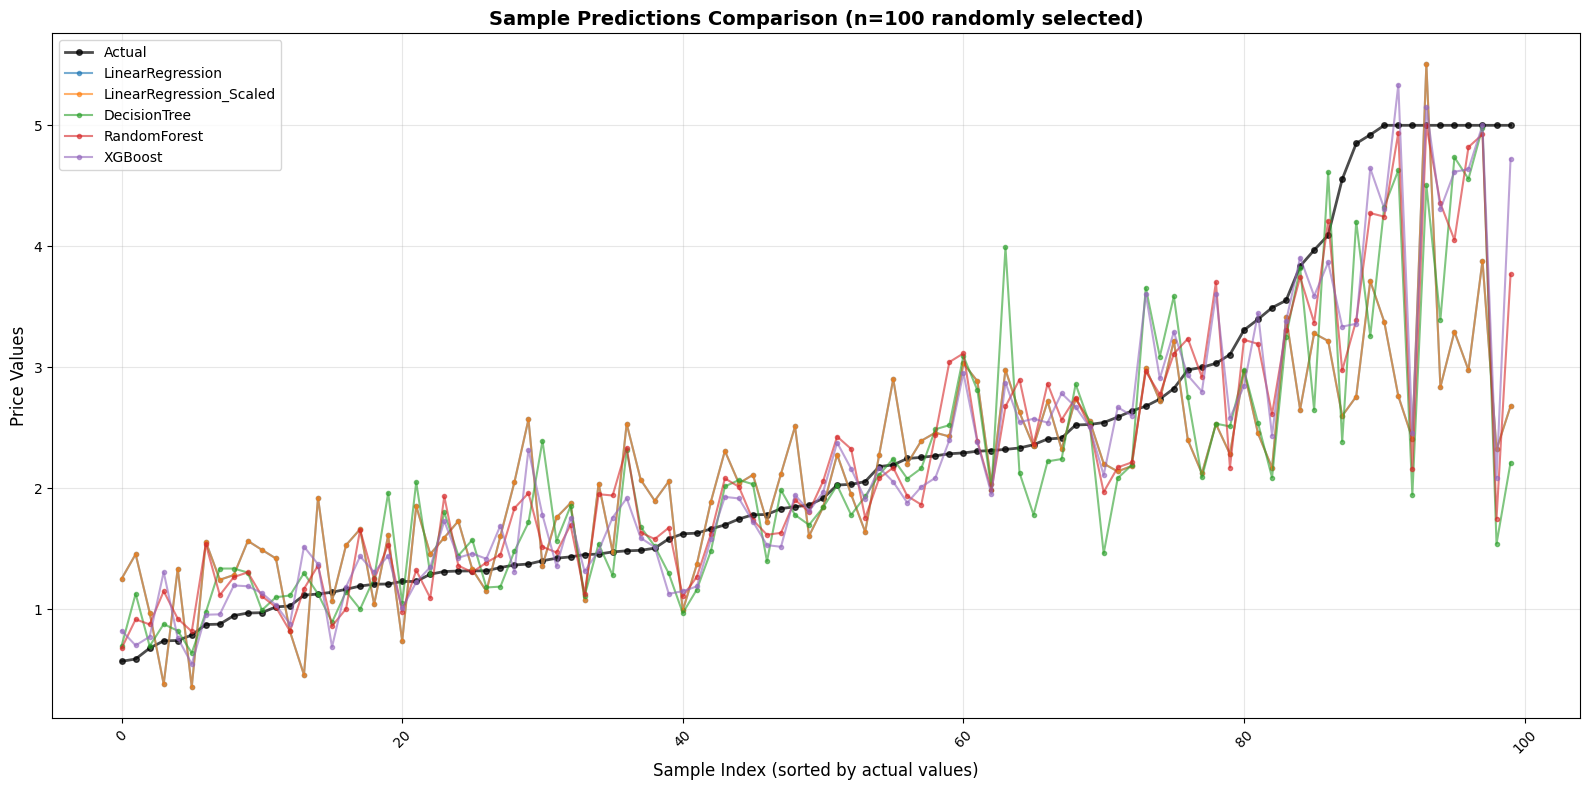

In [266]:
# Plot 5: Time series style comparison (sample of predictions)
sample_size = min(100, len(all_predictions))
sample_indices = np.random.choice(len(all_predictions), sample_size, replace=False)
sample_data = all_predictions.iloc[sample_indices].sort_values('actual')

plt.figure(figsize=(16, 8))

x_pos = np.arange(len(sample_data))
plt.plot(x_pos, sample_data['actual'], 'ko-', label='Actual', linewidth=2, markersize=4, alpha=0.7)

for model in models:
    plt.plot(x_pos, sample_data[model], 'o-', label=model, alpha=0.6, markersize=3, linewidth=1.5)

plt.xlabel('Sample Index (sorted by actual values)', fontsize=12)
plt.ylabel('Price Values', fontsize=12)
plt.title(f'Sample Predictions Comparison (n={sample_size} randomly selected)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/g2/c4ppjm_x53lfmhpz_sqp533r0000gn/T/ipykernel_6674/3535609789.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




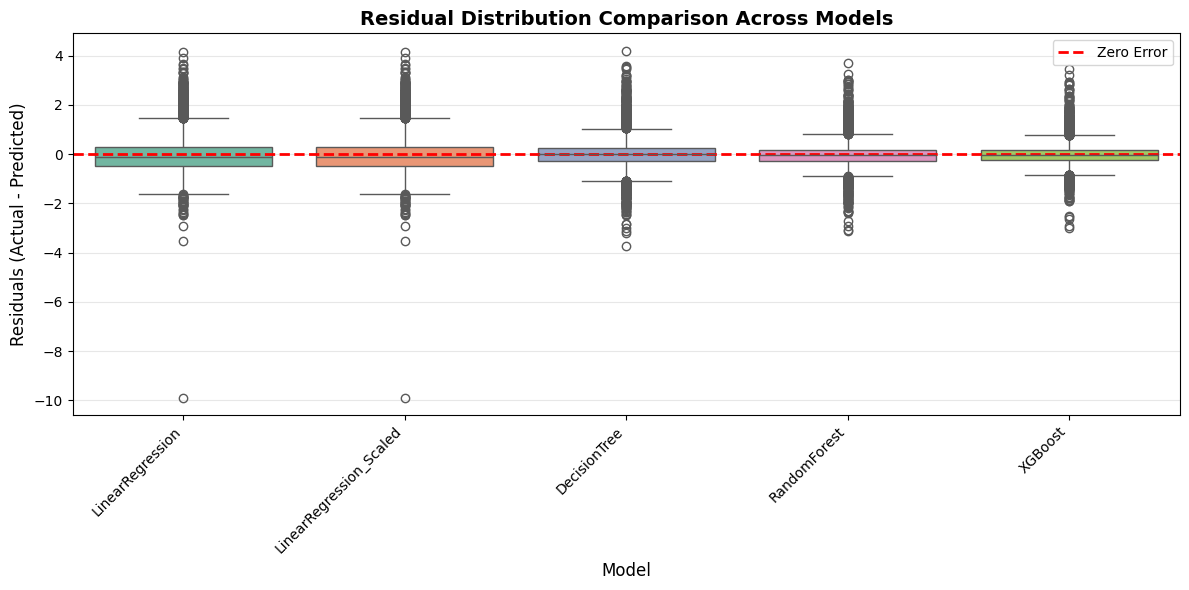

In [267]:
# Plot 6: Box plot of residuals
residuals_data = []
for model in models:
    residuals = all_predictions['actual'] - all_predictions[model]
    residuals_data.extend([(model, res) for res in residuals])

residuals_df = pd.DataFrame(residuals_data, columns=['Model', 'Residual'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=residuals_df, x='Model', y='Residual', palette='Set2')
plt.axhline(y=0, color='r', linestyle='--', lw=2, label='Zero Error')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.title('Residual Distribution Comparison Across Models', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


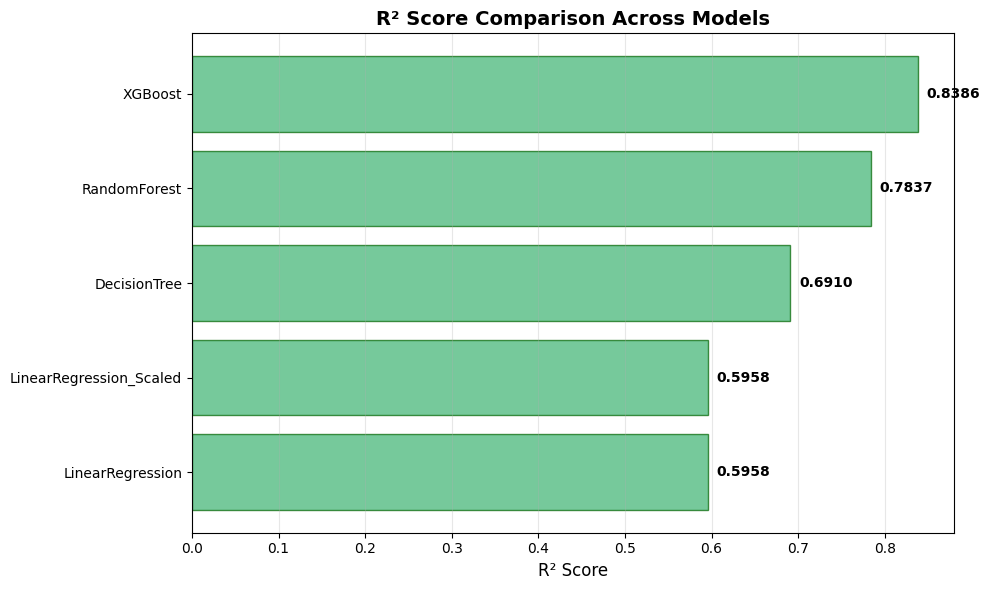


R² SCORE COMPARISON
                  Model  R² Score
       LinearRegression  0.595770
LinearRegression_Scaled  0.595770
           DecisionTree  0.691047
           RandomForest  0.783675
                XGBoost  0.838616


In [268]:
# Plot 7: R² Score comparison
from sklearn.metrics import r2_score

r2_scores = []
for model in models:
    r2 = r2_score(all_predictions['actual'], all_predictions[model])
    r2_scores.append({'Model': model, 'R² Score': r2})

r2_df = pd.DataFrame(r2_scores).sort_values('R² Score', ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(r2_df['Model'], r2_df['R² Score'], color='mediumseagreen', edgecolor='darkgreen', alpha=0.7)
plt.xlabel('R² Score', fontsize=12)
plt.title('R² Score Comparison Across Models', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, (idx, row) in enumerate(r2_df.iterrows()):
    plt.text(row['R² Score'] + 0.01, i, f'{row["R² Score"]:.4f}', 
             va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("R² SCORE COMPARISON")
print("="*60)
print(r2_df.to_string(index=False))
print("="*60)


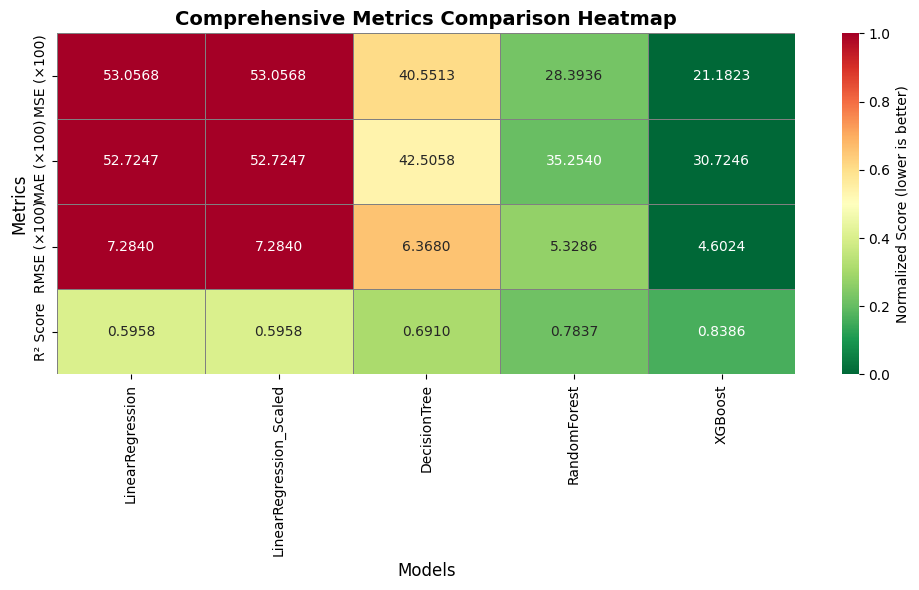


COMPREHENSIVE METRICS TABLE
                         MSE (×100)  MAE (×100)  RMSE (×100)  R² Score
Model                                                                 
LinearRegression          53.056778   52.724745     7.284008  0.595770
LinearRegression_Scaled   53.056778   52.724745     7.284008  0.595770
DecisionTree              40.551264   42.505792     6.367987  0.691047
RandomForest              28.393573   35.254030     5.328562  0.783675
XGBoost                   21.182274   30.724619     4.602420  0.838616


In [269]:
# Plot 8: Comprehensive metrics heatmap
metrics_data = []
for model in models:
    mse = mean_squared_error(all_predictions['actual'], all_predictions[model]) * 100
    mae = mean_absolute_error(all_predictions['actual'], all_predictions[model]) * 100
    r2 = r2_score(all_predictions['actual'], all_predictions[model])
    rmse = np.sqrt(mse)
    
    metrics_data.append({
        'Model': model,
        'MSE (×100)': mse,
        'MAE (×100)': mae,
        'RMSE (×100)': rmse,
        'R² Score': r2
    })

metrics_df = pd.DataFrame(metrics_data).set_index('Model')

# Normalize metrics for better visualization (except R² which is already normalized)
metrics_normalized = metrics_df.copy()
for col in ['MSE (×100)', 'MAE (×100)', 'RMSE (×100)']:
    metrics_normalized[col] = (metrics_df[col] - metrics_df[col].min()) / (metrics_df[col].max() - metrics_df[col].min())

# For R², we want higher to be better, so we'll invert it for visualization
metrics_normalized['R² Score'] = 1 - metrics_df['R² Score']

plt.figure(figsize=(10, 6))
sns.heatmap(metrics_normalized.T, annot=metrics_df.T, fmt='.4f', cmap='RdYlGn_r', 
            cbar_kws={'label': 'Normalized Score (lower is better)'}, 
            linewidths=0.5, linecolor='gray')
plt.title('Comprehensive Metrics Comparison Heatmap', fontsize=14, fontweight='bold')
plt.ylabel('Metrics', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("COMPREHENSIVE METRICS TABLE")
print("="*80)
print(metrics_df.to_string())
print("="*80)


In [270]:
import joblib as jb

jb.dump(xgmodel, "xgmodel.pkl")

['xgmodel.pkl']

In [271]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [272]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor())
])
pipe.fit(X_train, y_train)

,steps,"[('scaler', ...), ('xgb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None


In [273]:
jb.dump(pipe, "xgmodel.pkl")

['xgmodel.pkl']

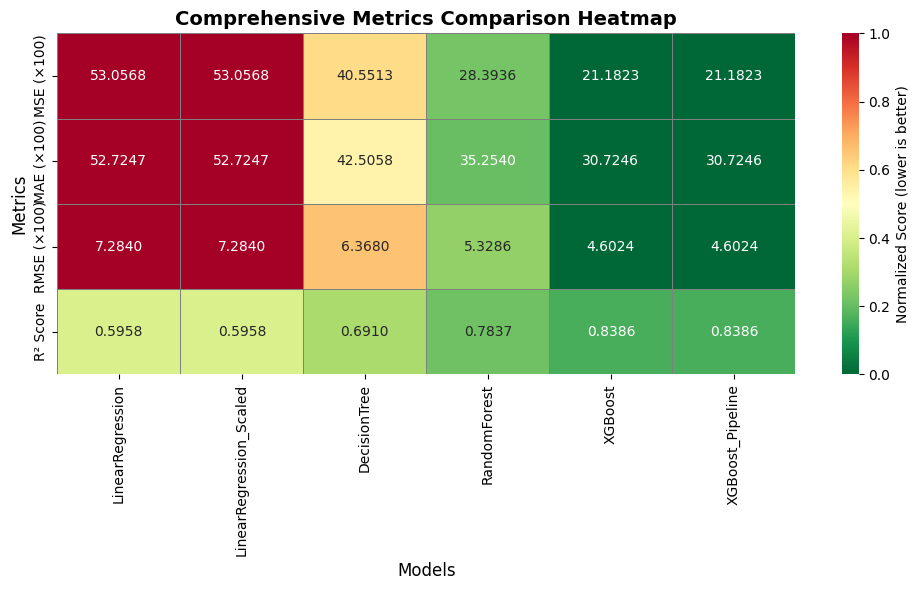


COMPREHENSIVE METRICS TABLE
                         MSE (×100)  MAE (×100)  RMSE (×100)  R² Score
Model                                                                 
LinearRegression          53.056778   52.724745     7.284008  0.595770
LinearRegression_Scaled   53.056778   52.724745     7.284008  0.595770
DecisionTree              40.551264   42.505792     6.367987  0.691047
RandomForest              28.393573   35.254030     5.328562  0.783675
XGBoost                   21.182274   30.724619     4.602420  0.838616
XGBoost_Pipeline          21.182274   30.724619     4.602420  0.838616


In [274]:
# --- Pipeline XGBoost predictions and comparison ---
pipe_pred = pipe.predict(X_test)

# Add pipeline XGBoost predictions to all_predictions DataFrame
all_predictions['XGBoost_Pipeline'] = pipe_pred

# Update models list to include pipeline XGBoost
models = [
    'LinearRegression',
    'LinearRegression_Scaled',
    'DecisionTree',
    'RandomForest',
    'XGBoost',
    'XGBoost_Pipeline'
]

# Re-run metrics and plots for all models including pipeline XGBoost
metrics_data = []
for model in models:
    mse = mean_squared_error(all_predictions['actual'], all_predictions[model]) * 100
    mae = mean_absolute_error(all_predictions['actual'], all_predictions[model]) * 100
    r2 = r2_score(all_predictions['actual'], all_predictions[model])
    rmse = np.sqrt(mse)
    metrics_data.append({
        'Model': model,
        'MSE (×100)': mse,
        'MAE (×100)': mae,
        'RMSE (×100)': rmse,
        'R² Score': r2
    })

metrics_df = pd.DataFrame(metrics_data).set_index('Model')

# (Optional) Heatmap and print table as before
metrics_normalized = metrics_df.copy()
for col in ['MSE (×100)', 'MAE (×100)', 'RMSE (×100)']:
    metrics_normalized[col] = (metrics_df[col] - metrics_df[col].min()) / (metrics_df[col].max() - metrics_df[col].min())
metrics_normalized['R² Score'] = 1 - metrics_df['R² Score']

plt.figure(figsize=(10, 6))
sns.heatmap(metrics_normalized.T, annot=metrics_df.T, fmt='.4f', cmap='RdYlGn_r',
            cbar_kws={'label': 'Normalized Score (lower is better)'},
            linewidths=0.5, linecolor='gray')
plt.title('Comprehensive Metrics Comparison Heatmap', fontsize=14, fontweight='bold')
plt.ylabel('Metrics', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("COMPREHENSIVE METRICS TABLE")
print("="*80)
print(metrics_df.to_string())
print("="*80)